<h1 align="center"><font color="red">Parsing PDFs using the pdfplumber Library in Python</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [Extracting Tables from a PDF](https://github.com/patchy631/machine-learning/blob/main/random/extracting_text_from_pdf.ipynb)

* [pdfplumber](https://github.com/jsvine/pdfplumber)

* [Examples pdfplumber](https://github.com/jsvine/pdfplumber/blob/stable/examples/notebooks/extract-table-nics.ipynb)

* [MEDIUM: A Step-by-Step Guide to Parsing PDFs using the pdfplumber Library In Python](https://medium.com/@azhar.sayyad6/a-step-by-step-guide-to-parsing-pdfs-using-the-pdfplumber-library-in-python-c12d94ae9f07)


# <font color="gree">Exemplo N° 1</font>

In [ ]:
import pdfplumber
import pandas as pd
from PIL import Image



pdf = pdfplumber.open("./warn_report.pdf")

# Carregar a página 0:
p0 = pdf.pages[0]

im = p0.to_image()
im

<font color="orange">O método mais simples é o método `extract_text()`, que retorna uma string contendo todo o TEXTO do PDF.</font>

In [ ]:
text = p0.extract_text()

print(text)

<font color="orange">O método `extract_table()`, a seguir, retorna uma lista de listas contendo os dados das TABELAS do PDF.</font>

In [ ]:
table = p0.extract_table()

table

In [ ]:
table[1:3]

In [ ]:
len(table[1:3])

In [ ]:
df = pd.DataFrame(table[1:], columns=table[0])

for column in ["Effective", "Received"]:
    df[column] = df[column].str.replace(" ", "")
    

In [ ]:

df.head()

In [ ]:
df.shape

# <font color="gree">Exemplo N° 2</font>

In [ ]:
import pdfplumber
from PIL import Image

# Abrir o PDF:
with pdfplumber.open("./warn_report.pdf") as pdf:
    # Carregar a página 0:
    pag_0 = pdf.pages[0]
    # Extrair o text:
    text = pag_0.extract_text()
    print(text)

    # Extrair o data:
    tables = pag_0.extract_table()
    for table in tables:
        print(table)

    # Extrair images:
    images = pag_0.to_image()
    images = images.original.convert("RGB")
    images.save(f"image.jpg", format ="JPEG")
            

# <font color="gree">Exemplo N° 3</font>

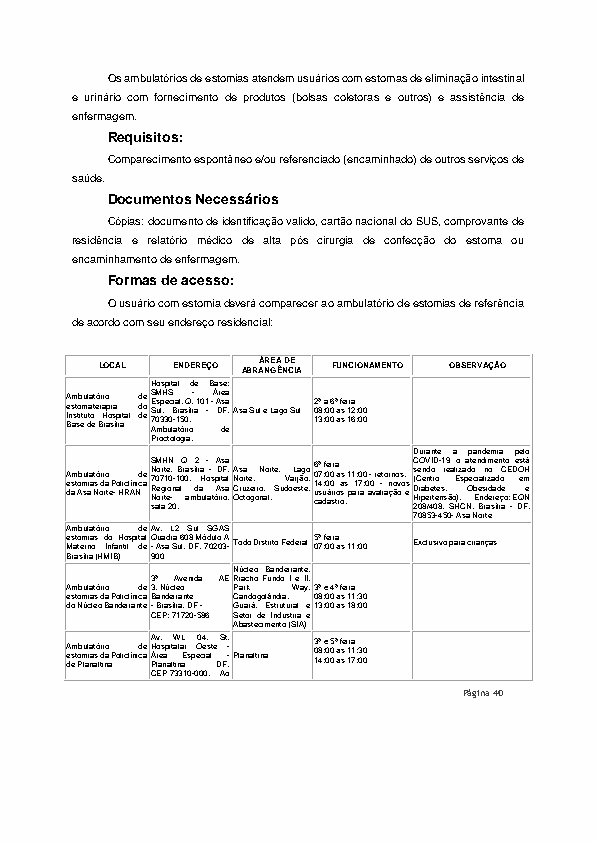

In [9]:
import pdfplumber
import pandas as pd
from PIL import Image



pdf = pdfplumber.open("./9.1 - Secretaria de Saúde - Cidadão.pdf")

# Carregar a página 40:
p40 = pdf.pages[39]

im = p40.to_image()
im

In [10]:
table = p40.extract_table()

table

[['LOCAL', 'ENDEREÇO', 'ÁREA DE\nABRANGÊNCIA', 'FUNCIONAMENTO', 'OBSERVAÇÃO'],
 ['Ambulatório de\nestomaterapia do\nInstituto Hospital de\nBase de Brasília',
  'Hospital de Base:\nSMHS - Área\nEspecial, Q. 101 - Asa\nSul, Brasília - DF,\n70330-150.\nAmbulatório de\nProctologia.',
  'Asa Sul e Lago Sul',
  '2ª a 6ª feira\n08:00 às 12:00\n13:00 às 16:00',
  ''],
 ['Ambulatório de\nestomias da Policlínica\nda Asa Norte- HRAN',
  'SMHN Q 2 - Asa\nNorte, Brasília - DF,\n70710-100. Hospital\nRegional da Asa\nNorte- ambulatório,\nsala 20.',
  'Asa Norte, Lago\nNorte, Varjão,\nCruzeiro, Sudoeste,\nOctogonal.',
  '6ª feira\n07:00 às 11:00 - retornos.\n14:00 às 17:00 - novos\nusuários para avaliação e\ncadastro.',
  'Durante a pandemia pelo\nCOVID-19 o atendimento está\nsendo realizado no CEDOH\n(Centro Especializado em\nDiabetes, Obesidade e\nHipertensão). Endereço: EQN\n208/408, SHCN, Brasília - DF,\n70853-450- Asa Norte'],
 ['Ambulatório de\nestomias do Hospital\nMaterno Infantil de\nBrasília

In [23]:
df = pd.DataFrame(table[1:], columns=table[0])

for column in ["LOCAL",	"ENDEREÇO",	"ÁREA DE\nABRANGÊNCIA",	"FUNCIONAMENTO", "OBSERVAÇÃO"]:
    df[column] = df[column].str.replace("\n", " ")

df


,LOCAL,ENDEREÇO,ÁREA DE\nABRANGÊNCIA,FUNCIONAMENTO,OBSERVAÇÃO
0,Ambulatório de estomaterapia do Instituto Hosp...,"Hospital de Base: SMHS - Área Especial, Q. 101...",Asa Sul e Lago Sul,2ª a 6ª feira 08:00 às 12:00 13:00 às 16:00,
1,Ambulatório de estomias da Policlínica da Asa ...,"SMHN Q 2 - Asa Norte, Brasília - DF, 70710-100...","Asa Norte, Lago Norte, Varjão, Cruzeiro, Sudoe...",6ª feira 07:00 às 11:00 - retornos. 14:00 às 1...,Durante a pandemia pelo COVID-19 o atendimento...
2,Ambulatório de estomias do Hospital Materno In...,"Av. L2 Sul SGAS Quadra 608 Módulo A - Asa Sul,...",Todo Distrito Federal,5ª feira 07:00 às 11:00,Exclusivo para crianças
3,Ambulatório de estomias da Policlínica do Núcl...,"3ª Avenida AE 3, Núcleo Bandeirante - Brasília...","Núcleo Bandeirante, Riacho Fundo I e II, Park ...",3ª e 4ª feira 08:00 às 11:30 13:00 às 18:00,
4,Ambulatório de estomias da Policlínica de Plan...,"Av. WL 04, St. Hospitalar Oeste - Área Especia...",Planaltina,3ª e 5ª feira 08:00 às 11:30 14:00 às 17:00,


In [24]:
print(df["LOCAL"].iloc[0])

Ambulatório de estomaterapia do Instituto Hospital de Base de Brasília


In [20]:
df.to_csv("saude_Table.csv", index=False)